# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


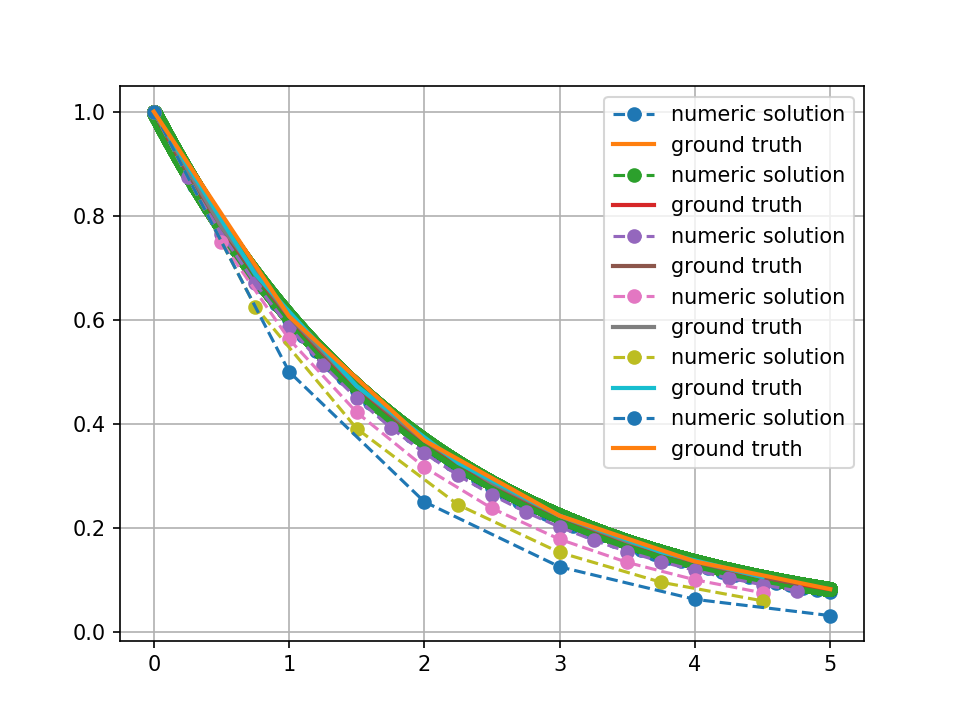

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Проверьте функцию выше, варьируя шаг $\tau$ (в коде это `dt`), $|\lambda| \tau > 1$.

(10% итоговой оценки)

<IPython.core.display.Javascript object>


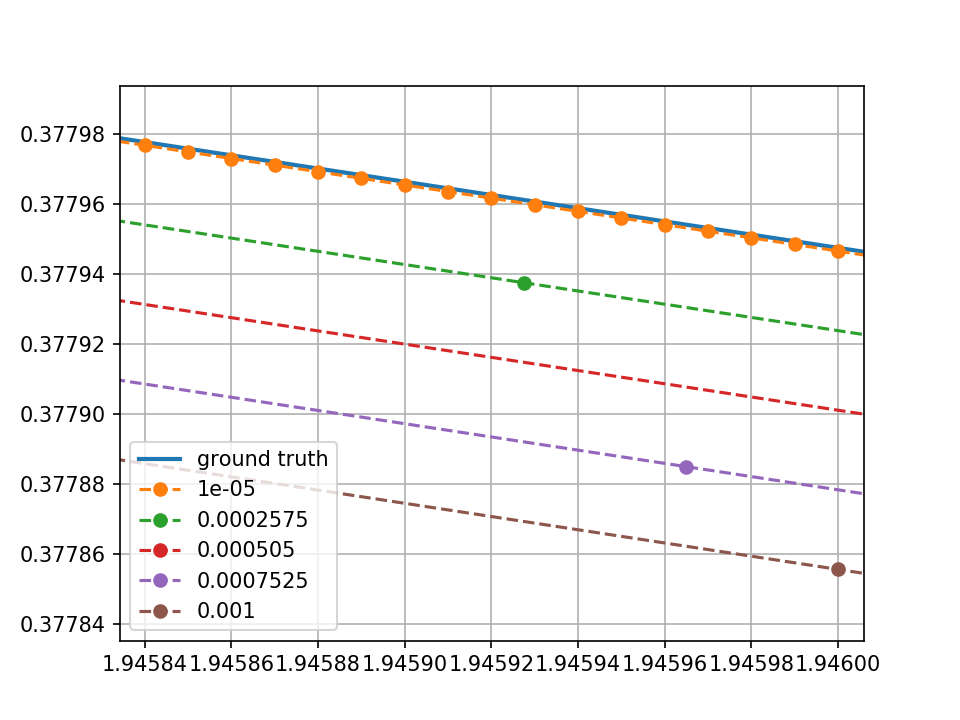

In [8]:
lam = -0.5
varior = np.linspace(1e-5, 1e-3, 5)

plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
for dt1 in varior:
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=dt1)
    plt.plot(tt, y, 'o--', label=dt1)
plt.legend(loc='best')
plt.grid(True)

### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя невную схему Эйлера. Сравните поведение неянвой и явной схем Эйлера. Обсудите.

(10% итогвой оценки)

In [28]:
def euler_solve2(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] /(1 - dt * lam)
    return tt, y

<IPython.core.display.Javascript object>


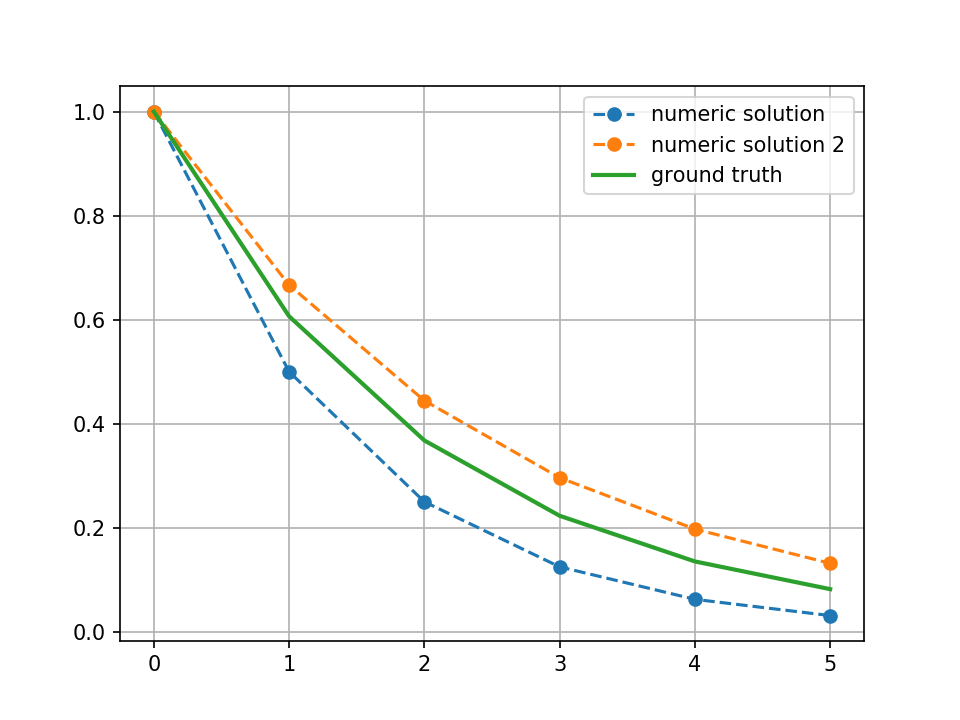

In [65]:
lam = -0.5
u0 = 1
T = 5
dt = 1
#явный метод
tt, y = euler_solve(lam, u0, T, dt)
plt.plot(tt, y, 'o--', label='numeric solution')

#неявный метод
tt2, y2 = euler_solve2(lam, u0, T, dt)
plt.plot(tt2, y2, 'o--', label='numeric solution 2')


plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

In [66]:
"""Из графика видно, что неявный метод эйлера лучше решает уравнение при больших dt"""

'Из графика видно, что неявный метод эйлера лучше решает уравнение при больших dt'

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [67]:
def euler_solve_matrix(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((2, num_steps+1))
    y[:,0] = u0             
    for k in range(num_steps):
        y[:,k+1] = y[:,k] + dt*lam @ y[:,k]
    return tt, y

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(20% итоговой оценки)

In [76]:
lam = np.asarray([[-10, 10], [32, - 499]])
u0 = np.asarray([-1,0])
tt, y = euler_solve_matrix(lam, u0, T=5, dt=0.1)
H = np.linalg.eigvals(lam)
print('Стабильность', max(abs(H))/min(abs(H)))

Стабильность 53.45902427704808


### Тест II.2

Реализуйте $\textit{неявную}$ схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линйных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(20% итоговой оценки)

In [77]:
def euler_solve_matrix2(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((2, num_steps+1))
    y[:,0] = u0             
    for k in range(num_steps):
        y[:, k+1] = np.linalg.solve((np.eye(2) - dt * lam), y[:, k])
    return tt, y

Стабильность 53.45902427704808


<IPython.core.display.Javascript object>


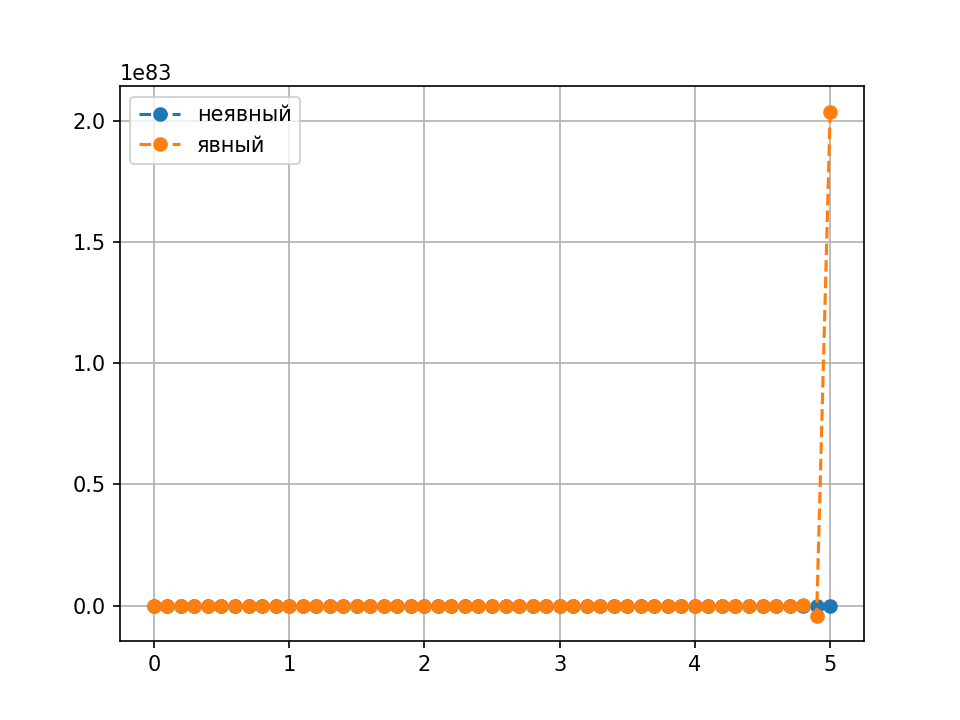

In [93]:
lam = np.asarray([[-10, 10], [32, - 499]])
u0 = np.asarray([-1,0])
tt2, y2 = euler_solve_matrix2(lam, u0, T=5, dt=0.1)
H = np.linalg.eigvals(lam)
print('Стабильность', max(abs(H))/min(abs(H)))

"""Сравним результаты, полученные в явном и неявном методе"""
plt.plot(tt2, y2[1, :], 'o--', label = 'неявный')
plt.plot(tt, y[1, :], 'o--', label = 'явный')
plt.grid(True)
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


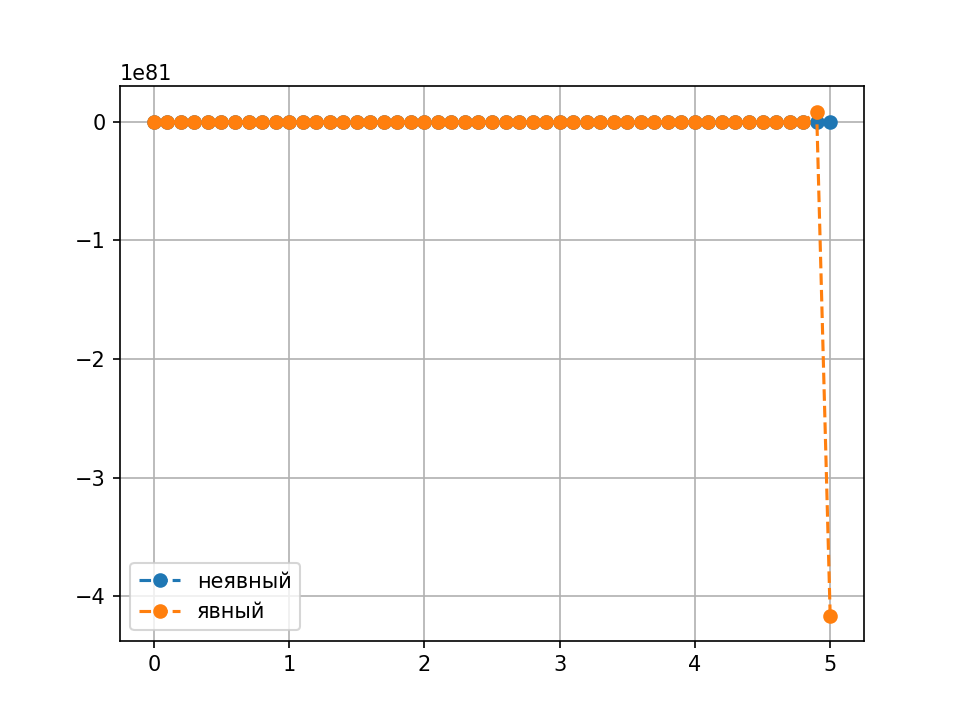

In [94]:
plt.plot(tt2, y2[0, :], 'o--', label = 'неявный')
plt.plot(tt, y[0, :], 'o--', label = 'явный')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# III. ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.

### Тест III.1 

Решите данную систему уравнений, используя явную  схему Эйлера так, чтобы ответ захватывал хотя бы несколько периодов осциллятора. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняетс ли закон сохранения энергии?

(20% итоговой оценки)

<IPython.core.display.Javascript object>


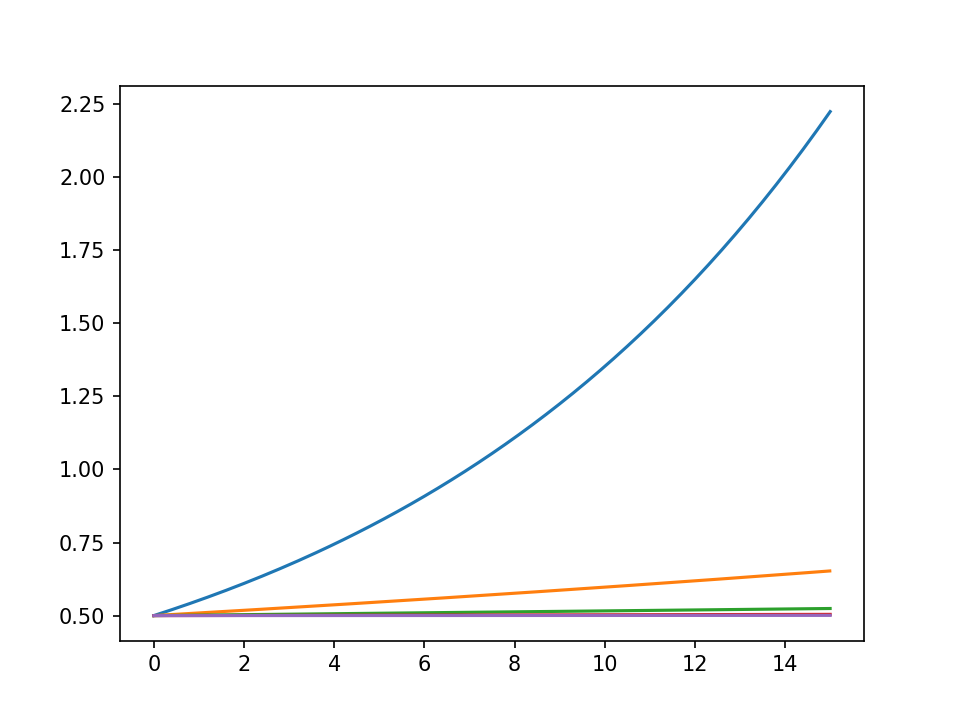

'На графике представлена зависимость энергии от времени и можно заметить что закон ее сохранения не выполняется'

In [96]:
w = 1
u0 = np.asarray([-1,0])
lam = np.array([[0, -w ** 2], [1, 0]])
T = 15

plt.figure()

NRG = np.linspace(1, 4, 5)
for i in NRG:
    tau = 10 ** (-i)
    tt, y = euler_solve_matrix(lam, u0, T, tau)
    E = (y[1, :]**2 + w**2 * y[0, :]**2) * 0.5

    plt.plot(tt, E)

plt.show()
"""На графике представлена зависимость энергии от времени и можно заметить что закон ее сохранения не выполняется"""

### Тест III.2

Реализуйте схему Рунге - Кутта второго порядка. Используте ее для решения того же уравнения с теми же шагами. Сравните решения, полученные методом Рунге - Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

(20% итоговой оценки)

In [97]:
def Runge_Kutta(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty((2, num_steps + 1))
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k+1] = y[:, k] + dt * (A @ y[:, k])
        y[:, k+1] = y[:, k] + dt * (A @ y[:, k] + A @ y[:, k+1]) * 0.5
    return tt, y

<IPython.core.display.Javascript object>


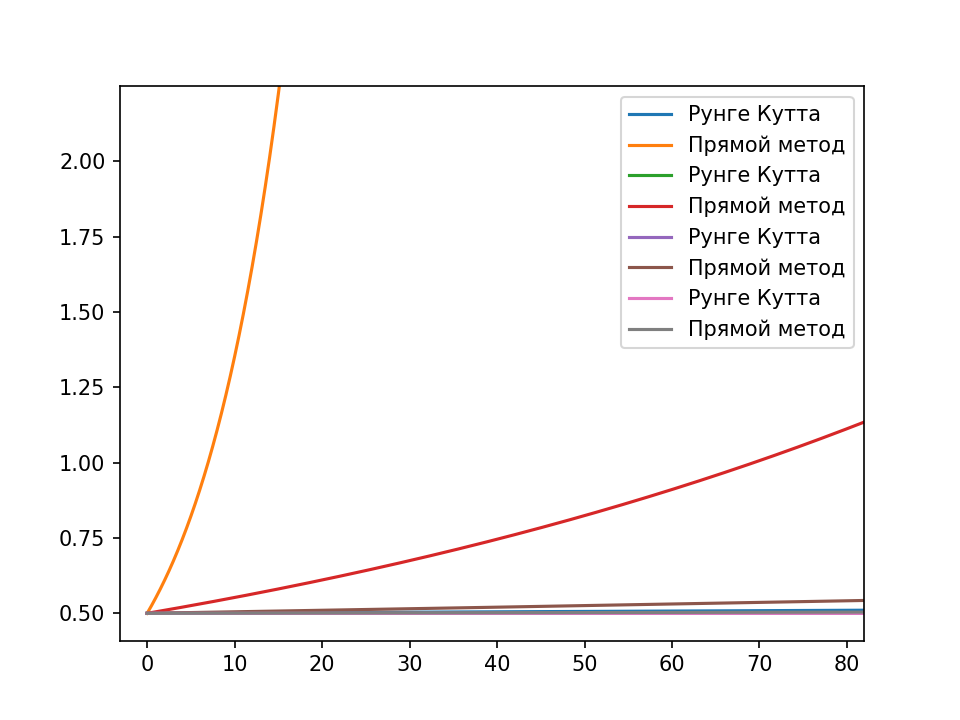

In [101]:
w = 1
u0 = np.asarray([-1,0])
lam = np.array([[0, -w ** 2], [1, 0]])
T = 100

plt.figure()

NRG = np.linspace(1, 4, 4)
for i in NRG:
    tau = 10 ** (-i)
    
    tt, y = Runge_Kutta(lam, u0, T, tau)
    E = (y[1, :]**2 + w**2 * y[0, :]**2) * 0.5
    plt.plot(tt, E, label = 'Рунге Кутта')
    
    tt, y = euler_solve_matrix(lam, u0, T, tau)
    E = (y[1, :]**2 + w**2 * y[0, :]**2) * 0.5
    plt.plot(tt, E, label = 'Прямой метод')

plt.legend(loc='best')
plt.show()

In [ ]:
"""Видно, что прямой метод достаточно плох и учень юыстро уходит на бесконечность, при Рунге Кутте можно сказать, что закон сохранения энергии работает достаточно неплохо"""